In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('ttrain.csv')
df2 = pd.read_csv('ttest.csv')

In [3]:
df1.shape

(891, 12)

In [4]:
df2.shape

(418, 11)

In [5]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C


In [6]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
91,983,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.775,NaN,S


In [7]:
df = df1.append(df2)

In [8]:
df.shape

(1309, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
1014/1309

0.774637127578304

#### Bir verinin %20'den fazlası boşsa o sütunu silebilirsiniz.

In [12]:
df["Fare"].mean() , df["Fare"].max() , df["Fare"].min() , df["Fare"].median()

(33.2954792813456, 512.3292, 0.0, 14.4542)

In [13]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())    #fillna boşlukları doldurmak için

In [14]:
import seaborn as sns

<AxesSubplot: xlabel='Embarked', ylabel='count'>

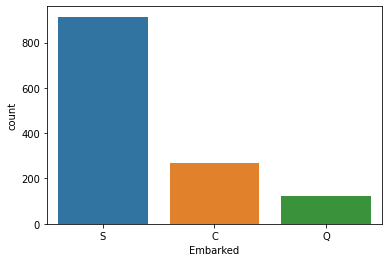

In [15]:
sns.countplot(x=df["Embarked"])

In [16]:
df["Embarked"].mode()

0    S
dtype: object

In [17]:
df["Embarked"].value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [18]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

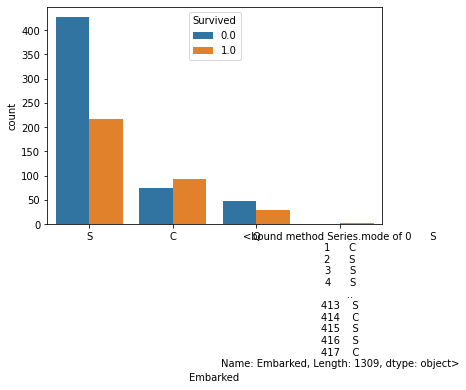

In [19]:
sns.countplot(x="Embarked",hue="Survived",data=df)

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [21]:
df["Embarked"].value_counts()

S                                                                                                                                                                                          914
C                                                                                                                                                                                          270
Q                                                                                                                                                                                          123
<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n413    S\n414    C\n415    S\n416    S\n417    C\nName: Embarked, Length: 1309, dtype: object>      2
Name: Embarked, dtype: int64

In [22]:
del df["Cabin"]
#df.drop("Cabin",axis=1, inplace=True)

In [23]:
df["Title"] = df["Name"].str.extract('([A-Za-z]+)\.', expand = False)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [25]:
del df["Name"]

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [27]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [28]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Sir           1
Jonkheer      1
Lady          1
Countess      1
Dona          1
Capt          1
Don           1
Mme           1
Name: Title, dtype: int64

<AxesSubplot: xlabel='Title', ylabel='count'>

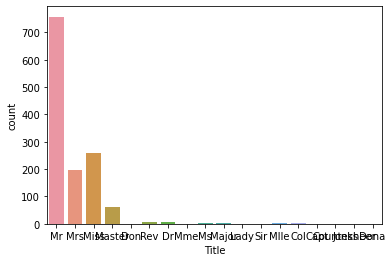

In [29]:
sns.countplot(x=df["Title"])

In [30]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [31]:
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"] = df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [32]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [33]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [34]:
df.groupby('Title')['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [35]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [36]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [37]:
df["Family"] = df["SibSp"]+df["Parch"]+1

In [38]:
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
344,345,0.0,2,male,36.00,0,0,229236,13.0000,S,Mr,1
56,948,NaN,3,male,35.00,0,0,349230,7.8958,S,Mr,1
218,219,1.0,1,female,32.00,0,0,11813,76.2917,C,Miss,1
300,1192,NaN,3,male,32.00,0,0,347079,7.7750,S,Mr,1
403,404,0.0,3,male,28.00,1,0,STON/O2. 3101279,15.8500,S,Mr,2
161,1053,NaN,3,male,7.00,1,1,2650,15.2458,C,Master,3
84,85,1.0,2,female,17.00,0,0,SO/C 14885,10.5000,S,Miss,1
890,891,0.0,3,male,32.00,0,0,370376,7.7500,Q,Mr,1
834,835,0.0,3,male,18.00,0,0,2223,8.3000,S,Mr,1
831,832,1.0,2,male,0.83,1,1,29106,18.7500,S,Master,3


In [39]:
df.drop(["PassengerId","Ticket"],axis=1, inplace=True)  #inplace=True df=df.... şeklinde yapmamak için

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [41]:
data = pd.get_dummies(df,drop_first=True)

In [42]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,1,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,0,1,0,1,0


In [43]:
train = data[:891]
test = data[891:]

In [44]:
train.shape , test.shape

((891, 14), (418, 14))

In [45]:
y = train["Survived"]

In [46]:
x = train.drop("Survived",axis=1)

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g = GaussianNB()
b = BernoulliNB()

In [48]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [49]:
del test["Survived"]

In [57]:
pred1 = g.predict(test)

In [58]:
res = df2[["PassengerId"]]

In [59]:
res["Survived"] = pred1

<ipython-input-59-92d82a78b70a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Survived"] = pred1


In [60]:
res

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [62]:
res["Survived"]=res["Survived"].astype('int64')

<ipython-input-62-d533f70e58a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Survived"]=res["Survived"].astype('int64')


In [63]:
res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
res.to_csv("titanic_prediction.csv",index=False)

In [65]:
pred2 = g.predict(test)

In [66]:
res2 = df2[["PassengerId"]]

In [67]:
res2["Survived"] = pred2

<ipython-input-67-71420128156e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res2["Survived"] = pred2


In [68]:
res2["Survived"]=res2["Survived"].astype('int64')

<ipython-input-68-386947176be9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res2["Survived"]=res2["Survived"].astype('int64')


In [69]:
res2.to_csv("titanic_prediction2.csv",index=False)